<a href="https://colab.research.google.com/github/yohanesnuwara/geodatascience/blob/main/NorthernLights_ImageLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install dlisio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.5/732.5 kB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from dlisio import dlis
import matplotlib.pyplot as plt

In [ ]:
f, *tail = dlis.load('/content/drive/MyDrive/Prores/Northernlights/NO_31_5-7___STAT_IMAGE_CT.dlis')


In [ ]:
def get_data_from_dlis(filepath, channel_name):
    with dlis.load(filepath) as files:
        for d in files:
            data_channels = d.find('CHANNEL', channel_name)
            for channel in data_channels:
                data_array = channel.curves()
    return data_array

def summary_dataframe(object, **kwargs):
    # Create an empty dataframe
    df = pd.DataFrame()

    # Iterate over each of the keyword arguments
    for i, (key, value) in enumerate(kwargs.items()):
        list_of_values = []

        # Iterate over each parameter and get the relevant key
        for item in object:
            # Account for any missing values.
            try:
                x = getattr(item, key)
                list_of_values.append(x)
            except:
                list_of_values.append('')
                continue

        # Add a new column to our data frame
        df[value]=list_of_values

    # Sort the dataframe by column 1 and return it
    return df.sort_values(df.columns[0])

In [ ]:

# origin, *origin_tail = f.origins
# print(len(origin_tail))

In [ ]:
# origin.describe()

In [ ]:
with dlis.load('/content/drive/MyDrive/Prores/Northernlights/NO_31_5-7___STAT_IMAGE_CT.dlis') as files:
    for f in files:
        for frame in f.frames:
            curves = frame.curves()
            # Do something with the curves

            for frame in f.frames:

                # Search through the channels for the index and obtain the units
                for channel in frame.channels:
                    if channel.name == frame.index:
                        depth_units = channel.units

                print(f'Frame Name: \t\t {frame.name}')
                print(f'Index Type: \t\t {frame.index_type}')
                print(f'Depth Interval: \t {frame.index_min} - {frame.index_max} {depth_units}')
                print(f'Depth Spacing: \t\t {frame.spacing} {depth_units}')
                print(f'Direction: \t\t {frame.direction}')
                print(f'Num of Channels: \t {len(frame.channels)}')
                print(f'Channel Names: \t\t {str(frame.channels)}')
                print('\n\n')

Frame Name: 		 0.000488281B
Index Type: 		 BOREHOLE-DEPTH
Depth Interval: 	 2593.445800781 - 2783.563964844 m
Depth Spacing: 		 0.00048828125 m
Direction: 		 None
Num of Channels: 	 8
Channel Names: 		 [Channel(DEPTH), Channel(DIA_IMG), Channel(IMAGE_DYNAMIC), Channel(IMAGE_STATIC), Channel(IMAGE_XZ_DYNAMIC), Channel(IMAGE_XZ_STATIC), Channel(IMAGE_YZ_DYNAMIC), Channel(IMAGE_YZ_STATIC)]





In [ ]:
f = '/content/drive/MyDrive/Prores/Northernlights/NO_31_5-7___STAT_IMAGE_CT.dlis'

depth_array = get_data_from_dlis(f, 'DEPTH')
image_array = get_data_from_dlis(f, 'IMAGE_XZ_DYNAMIC')
dia_array = get_data_from_dlis(f, 'DIA_IMG')


depth_array

array([2593.44580078, 2593.44628906, 2593.44677734, ..., 2783.56298828,
       2783.56347656, 2783.56396484])

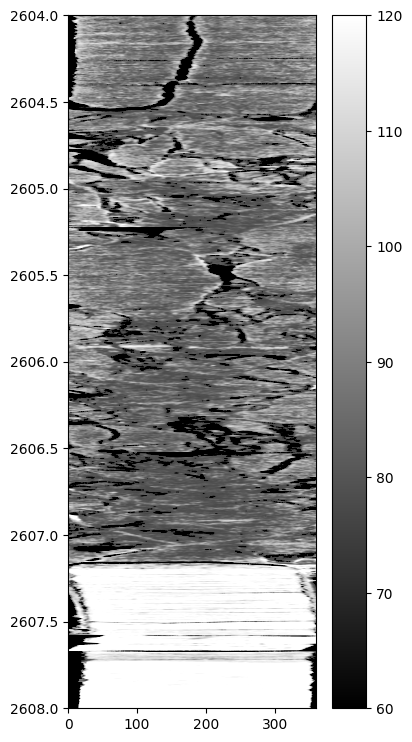

In [ ]:
plt.figure(figsize=(4,9))
plt.imshow(image_array, aspect='auto', cmap='gray',
           extent=(0,360,depth_array.min(),depth_array.max()), vmin=(60,120))
plt.gca().invert_yaxis()
plt.ylim(2608,2604)
# plt.ylim(2598,2592)
plt.colorbar()

In [ ]:
frame1 = f.object('CHANNEL', 'IMAGE_STATIC')
curves = frame1.curves()
frame1

Channel(IMAGE_STATIC)

In [ ]:
frame1 = f.object('CHANNEL', 'CALI')
curves = frame1.curves()

In [ ]:
f.object('CHANNEL', 'T.CHANNEL-I.DEPTH-O.2-C.1')

ValueError: Object not found: type=CHANNEL, name=T.CHANNEL-I.DEPTH-O.2-C.1, origin='any', copynumber='any'

In [ ]:
curves.dtype

dtype([('FRAMENO', '<i4'), (('T.CHANNEL-I.DEPTH-O.2-C.1', 'DEPTH'), '<f8'), (('T.CHANNEL-I.CALI-O.2-C.1', 'CALI'), '<f4'), (('T.CHANNEL-I.CALI1-O.2-C.1', 'CALI1'), '<f4'), (('T.CHANNEL-I.CALI2-O.2-C.1', 'CALI2'), '<f4'), (('T.CHANNEL-I.GR-O.2-C.1', 'GR'), '<f4'), (('T.CHANNEL-I.IMAGE_DYNAMIC-O.2-C.1', 'IMAGE_DYNAMIC'), '<f4', (360,)), (('T.CHANNEL-I.IMAGE_STATIC-O.2-C.1', 'IMAGE_STATIC'), '<f4', (360,)), (('T.CHANNEL-I.P1AZ-O.2-C.1', 'P1AZ'), '<f4')])

In [ ]:
frame.description

'Geolog Exported Data.'